In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
train_set = pd.read_csv('../../train.csv')
test_set = pd.read_csv('../../test.csv')

In [30]:
# checking NAN values
print(any(train_set.isnull().any()))
print(any(test_set.isnull().any()))

False
False


In [31]:
train_set.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [32]:
#replace 'String' with numeric values for target value

train_set['Species'] = train_set['Species'].map({'Iris-versicolor':1, 'Iris-virginica':2, 'Iris-setosa':3})
test_set['Species'] = test_set['Species'].map({'Iris-versicolor':1, 'Iris-virginica':2, 'Iris-setosa':3})

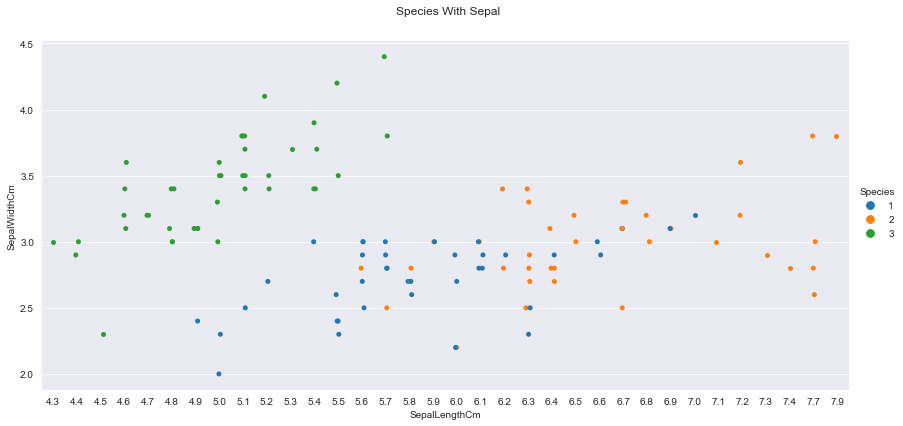

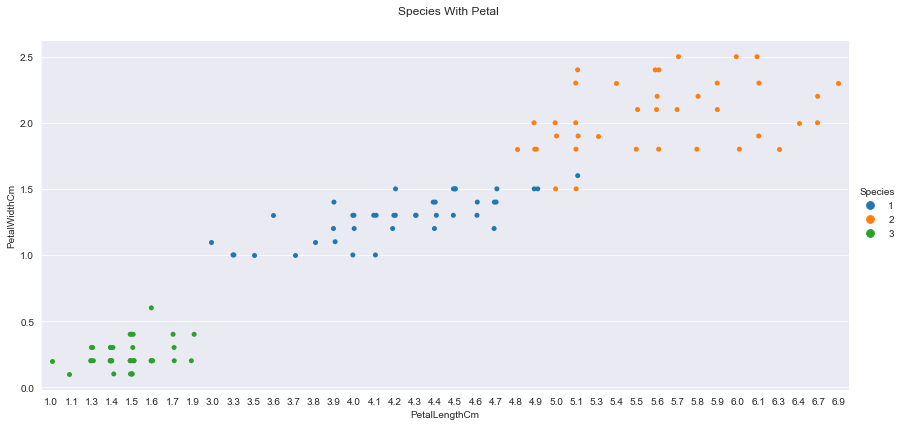

In [33]:
#showing categorical plot

cat_plot1 = sns.catplot(x ='SepalLengthCm',
            y ='SepalWidthCm',
            hue='Species',
            data = train_set,
            height=6, aspect=2)
cat_plot1.fig.suptitle('Species With Sepal')
cat_plot1.fig.subplots_adjust(top=0.9)

cat_plot2 = sns.catplot(x ='PetalLengthCm',
            y ='PetalWidthCm',
            hue='Species',
            data = train_set,
            legend= 'Species With Petal',
            height=6, aspect=2)
cat_plot2.fig.suptitle('Species With Petal')
cat_plot2.fig.subplots_adjust(top=0.9)

In [34]:
#splitting dataset

x_train = train_set.drop(columns=['Id', 'Species'])
y_train = train_set['Species']

x_test = test_set.drop(columns=['Id', 'Species'])
y_test = test_set['Species']

In [35]:
# KNN Implementation
from collections import Counter

class KNN:
    def __init__(self):
        self.k = None
        self.x_train = None
        self.y_train = None

    def fit(self, x, y, k_neighbor=2):
        self.x_train = x.to_numpy()
        self.y_train = y.to_numpy()
        self.k = k_neighbor

    def predict(self, x_input:pd.DataFrame):
        x_input = x_input.to_numpy()
        predictions = [self._predict(x) for x in x_input]
        return pd.DataFrame(predictions)

    def _predict(self, x):
        # compute the distance
        distances = [self.euclidean_distance(x, x_train_set) for x_train_set in self.x_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voting
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

    @classmethod
    def euclidean_distance(cls, x, y):
        return np.sqrt(np.power(np.sum(x-y), 2))

In [38]:
# KNN Running
knn = KNN()
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)

In [43]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_train, y_train_pred))
pd.Series(accuracy_score(y_train, y_train_pred), index=['Accuracy'])

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        40
           2       0.97      0.97      0.97        38
           3       0.98      0.98      0.98        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



Accuracy    0.966667
dtype: float64

In [45]:
#Running Model On test set
y_test_pred = knn.predict(x_test)
print(classification_report(y_test, y_test_pred))
pd.Series(accuracy_score(y_test, y_test_pred), index=['Accuracy'])

              precision    recall  f1-score   support

           1       0.86      0.60      0.71        10
           2       0.73      0.92      0.81        12
           3       1.00      1.00      1.00         8

    accuracy                           0.83        30
   macro avg       0.86      0.84      0.84        30
weighted avg       0.85      0.83      0.83        30



Accuracy    0.833333
dtype: float64